# Final Project Submission


Please fill out:
* Student name: Ann Marie
* Student pace: Self-paced
* Scheduled project review date/time: February 24, 2019
* Instructor name: Jacob Eli Thomas
* Blog post URL:

## The Project:


Our stakeholders are a local realty company in Seattle, Washington that wants to offer their customers a unique service. They want to include in their analysis of a local home a quantitative way to assess the price of the house. They were able to procure the Kings County housing dataset and hired us to help them. 

#### Clean, explore and model the Kings County Housing dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.




## OSEMiN


For this project, we will be using the **OSEMiN** process which stands for Obtain, Scrub, Explore, Model and Interpret. We start with a quick description of the framework.

**O: Obtain the right data.**

**S: Pre-process the data.**

**E: Explore the data.**

**M: Model the data.**

**N: Interpret or provide insight with the conclusions of the model.**


## OBTAIN:

Our goal is to explore this data and use regression analysis to give the business a framework to analyze and forecast prices for houses in the area. 

Obtaining the data itself is relatively simple for us. All of the data is available in a csv file which we will load into a pandas dataframe below.  



In [1]:
# importing libraries and loading data into the DataFrame
# we may import more libraries along the way as needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')
kc = pd.read_csv('kc_house_data.csv')
kc.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Scrubbing and exploring the data:


We will explore and pre-process the data at the same time - combining "Scrub" with some parts of the "Exploratory Data Analysis" stages together. Here are the steps we are focused on:

1. Casting columns to the appropriate data types
2. Identify and deal with null values appropriately
3. Pick the appropriate columns to be used for modelling
4. Check for and deal with multicollinearity
5. Normalize or standardize our data
6. Visualize the data
7. Examine the descriptive statistics of our data sets and the distributions of various columns
8. Dealing with categorical data
9. Dealing with outliers

An initial look at the data shows us 21 columns. The descriptions of the series tells us immediately that Id is just a descriptive column and will give us very little information about the sale price of the house. There are a lot of different columns that describe the living space within and around the house in some granularity and seem to have some overlapping information. We will check into that further in this notebook. Let's now look into the quality of the data series.

In [2]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Two columns have an object datatype - they have been set up as string columns. The first one is the date column - this datatype should be in object format and we won't change it. The second one is the sqft_basement. Given that this should be ordinal, clearly the data is not clean. Let's dig into that a little bit further. 

In [3]:
kc.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
1913.0        1
415.0         1
2490.0        1
2120.0        1
207.0         1
2310.0        1
506.0         1
1275.0        1
2190.0        1
652.0         1
475.0         1
1960.0        1
20.0          1
417.0         1
556.0         1
176.0         1
792.0         1
1990.0        1
906.0         1
768.0         1
508.0         1
2730.0        1
2050.0        1
3500.0        1
4820.0        1
1135.0        1
2300.0        1
172.0         1
2570.0        1
518.0         1
Name: sqft_basement, Len

59.4% of the observations have 0 sq footage in the basement. 2.1% have a string variable "?" in them. It makes sense to convert the ? to 0s and we can convert the column to a numerical datatype. 

In [4]:
#filling the "?" with 0s for sqft_basement
kc.loc[kc['sqft_basement'] == '?', 'sqft_basement'] = '0.0'
kc['sqft_basement'] = kc['sqft_basement'].astype("float32")

#### Dealing with null values:


In the code below we take a  look at null values in the data. There are a few NaNs in the waterfront, view and yr_renovated columns. 

The waterfront column is binary: 0 for no waterfront view and 1 for waterfront view. Most of the observations are 0. The percentage of NaNs is low. Therefore, we will convert the NaNs to 0. 

For the view column, the definition says 'has been viewed' and the data has 5 unique values: 0,1,2,3,4. Given the definition, we assume 4 means a house is popular and been viewed several times. In reality, while the data is ordinal it feels like a categorical series. For example, does 4 mean the house has been viewed 4 times or is it in the highest percentile of views? We will come back to this later. For purposes of this analysis, 0 is the most common number and the percentage of NaNs is low. We will change the NaNs to 0.

The choice is a little bit more difficult in yr_renovated. Again, we turn to the definition of the series which is 'Year when house was renovated'. We are trying to use this data to predict expected prices. If the viewer of the listing does not know when or whether the house has been renovated, the assumption has to be that it has not been renovated at all. The buyer then looks at the yr_built column to determine the price. Therefore, it makes sense to turn the NaNs in the yr_renovated column to 0 as well. We do so in the next cell below.  

In [5]:
print(kc.isna().sum())
print(kc['waterfront'].describe())
print(kc['view'].describe())
print(kc['view'].value_counts())
kc['yr_renovated'].value_counts()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64
count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [6]:
# turning null values to 0.0. In this case the NaNs are not strings so can use fillna
kc.fillna(0, inplace=True)
print(kc.isna().sum())
kc['view'] = kc['view'].round(0).astype(int)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Lets now look at the description of the columns and then visualize them. 

In [7]:
round(kc.describe(),1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540296.6,3.4,2.1,2080.3,15099.4,1.5,0.0,0.2,3.4,7.7,1788.6,285.7,1971.0,68.8,98078.0,47.6,-122.2,1986.6,12758.3
std,2.876736e+09,367368.1,0.9,0.8,918.1,41412.6,0.5,0.1,0.8,0.7,1.2,827.8,439.8,29.4,364.0,53.5,0.1,0.1,685.2,27274.4
min,1.000102e+06,78000.0,1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0
25%,2.123049e+09,322000.0,3.0,1.8,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.2,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.5,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,550.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0


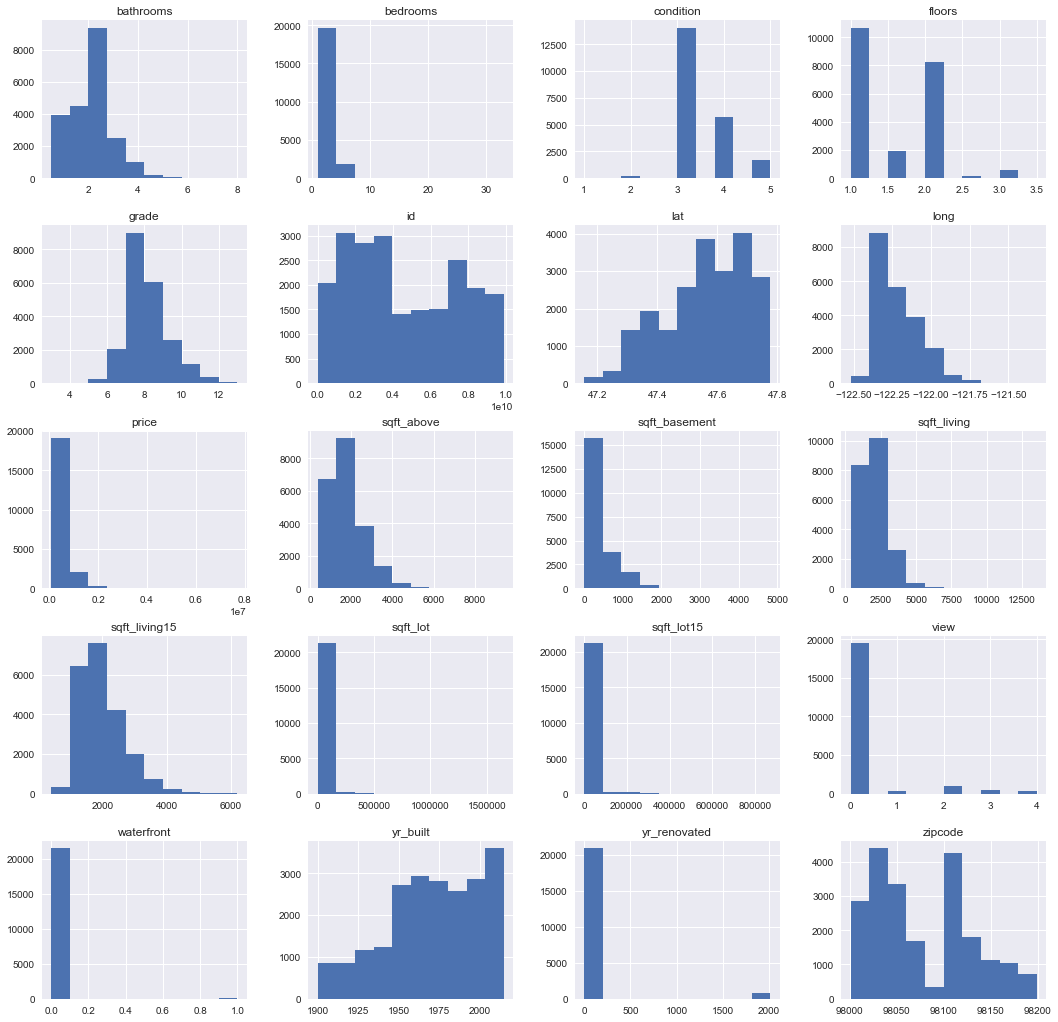

In [8]:
#visualizing all the columns
kc.hist(figsize=(18,18));

We have 20 columns that could potentially be used to predict prices. Let's go through these in some detail. 

Id is the unique identifier used for the house. Clearly we won't be using that to predict house prices. Also the date column (when the house was sold) for purposes of this exercise will not be used. In many cases, time will have a bearing on the price of a house but we don't really identify an overall index of prices in this case for a time-series study. 

There are three series we can identify as either binary or categorical. The three are waterfront, view and zipcode. There are several series that could be considered interval or somewhat continous like bedrooms, bathrooms, condition, floors. We will return to this issue later.

Several series seem to display skewed distributions with outliers. yr_renovated is one that stands out in this regard. Initially we considered binning this series. However, 95.8% of the observations are 0 (not been renovated). The informative value of this series is low. We will drop it from the data set. We have a similar view of the series 'waterfront' where the value counts show an overwhelming number of 0's. We drop 'waterfront' as well. 

Practically speaking, both 'waterfront' and 'yr-renovated' may have great explanatory behavior for the outlier prices. In other words there are probably some houses in the series which don't have extremely large square feet but have been renovated recently and/or have a beautiful water view. We are dropping the low informative value series in order to be able to capture the overall data via regressions while keeping the number of explanatory variables low. This is especially true of 'yr-renovated' series. The 'waterfront' series (if we one-hot encoded it) would only have one extra series. However, the number of waterfront houses are less than 1% of the overall data. So we feel comfortable in dropping it. 

Other series that could potentially be binned are yr_built. However the data (with a visual check of the histogram) looks continous enough that we decided to leave it untouched. Again, we are conscious of the fact that we need to walk a fine line between accuracy and creating too many series. 

Looking at the percentile levels in the 'describe' function, several series have distributions with outliers including the target series 'price'. It seems there are a few very highly priced houses with very large living square feet and several bedrooms. We will investigate skewness and kurtosis of the non-categorical series further below.

Some series have multi-modal distributions as well. We would expect that its possible that the data will require some pre-processing for regressions and that several iterations will be required. More on that as we start modeling. 

We begin to filter out columns we will not be using for the multivariate regression. In the code below we create a new dataframe for the predictors. We drop the data and ID columns.

In [9]:
# new predictors DataFrame that drops two unnecessary columns and 2 columns we decide not to use
kc_pred = kc.drop(["id","date","yr_renovated","waterfront"], axis=1)
#unique values in waterfront column
print(kc['waterfront'].value_counts())
#unique values in yr_renovated column
kc['yr_renovated'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64


0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

#### Multicollinearity:

There are several columns where the descriptions suggest they could be very correlated to each other (for example sqft_living, sqft_above, sqft_lot, sqft_living15). Let's look at the correlation matrix which returns pairwise correlations. Generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation. We have decided to use 0.7 as our cut-off to pick independent variables (IVs). 

In [10]:
#pair-wise correlation matrix
kc_pred.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,-0.059541,0.049239,0.125943,0.280102,-0.010722
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.249082,-0.146896,1.000000,0.756073,0.165843,0.447865,-0.185771,0.113575,0.200341,0.713867,0.120981
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.166017,-0.158904,0.756073,1.000000,-0.051175,0.424037,-0.261570,-0.001199,0.344842,0.731767,0.195077


In [11]:
# True for absolute value of correlation above 0.70
abs(kc_pred.corr()) > 0.70

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_above,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False


Sqft_living is very highly correlated with bathrooms, grade, sqft_above and sqft_living15. Which one of those 4 should we keep? Looking at the descriptions of the four columns, sqft_living seems to encompass the most information that is directly relevant to the home in question. We will keep that column and drop the other three. Also sqft_lot15 is highly correlated to sqft_lot. Again sqft_lot (looking at the description of the columns) seems to be most directly relevant to the house its indexed to. we drop sqft_lot15.


In [12]:
# dropping correlated columns from predictive DataFrame
kc_pred = kc_pred.drop(["bathrooms","grade","sqft_above","sqft_living15","sqft_lot15"], axis=1)

We take one more pass at the correlations by running a correlation mask for the remaining predictive series (and the target variable) below. 

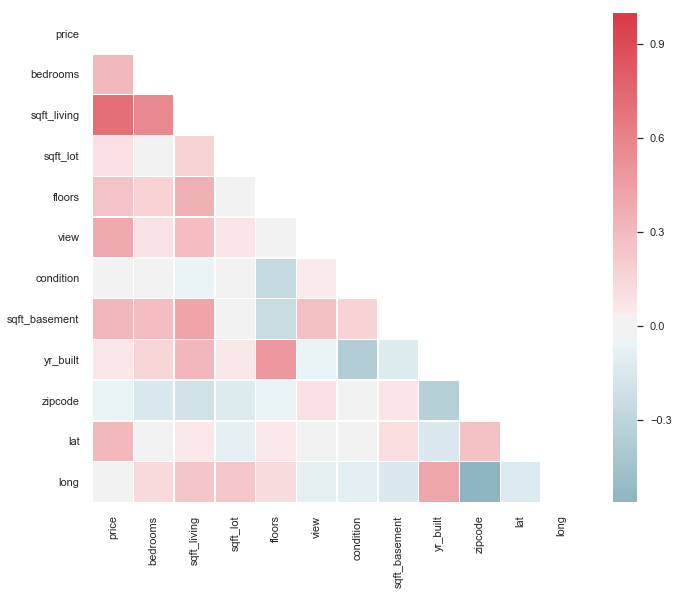

In [13]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = kc_pred.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)


Price is most correlated to sqft_living. Logically, it makes sense that the price of a house is directly determined by the size of the living space in it. There is still a fair degree of correlation between zipcode and longitude (though not large enough to remove one or the other). Bedrooms and sqft_living are highly correlated (though again, not enough to make the 0.7 cut-off). Looking at the description of the two series, the correlation makes sense. While the correlation mask gives us some clues to which IVs will be important in the regression, it doesn't give us any information that will cause us to change the composition of our predictive series.  
We will now take another look at the distributions of the continous series. As mentioned before, we believe that 'view' and 'zipcode' are categorical and will need to be one-hot encoded. While both series are ordinal, for zipcode the numbers dont have a natural ascending or descending meaning. For the series 'view', the ordinal numbers may not translate in magnitude. We feel safer in making it a categorical series. 

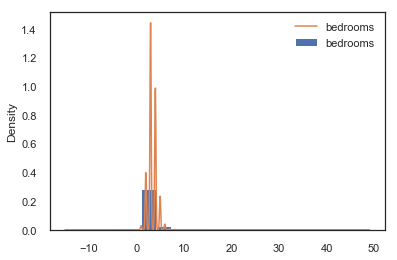

Skewness = 2.0235006824707016
kurtosis = 49.81002325740027


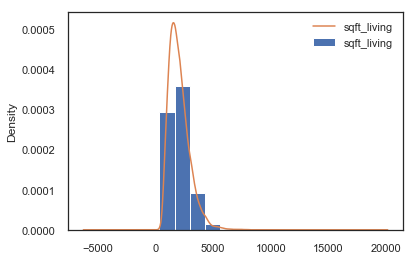

Skewness = 1.4731131326116373
kurtosis = 5.2506082929452305


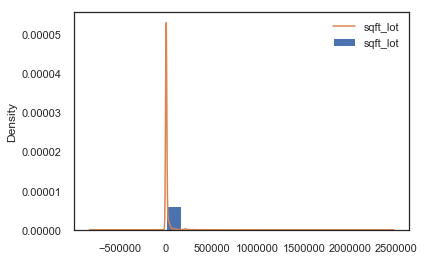

Skewness = 13.071695603822912
kurtosis = 285.4294421924969


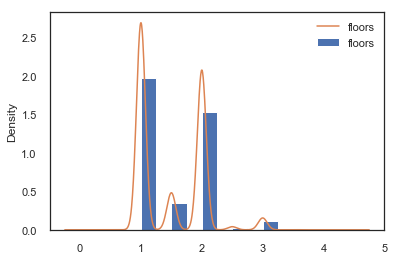

Skewness = 0.6144542954741122
kurtosis = -0.4912298816497902


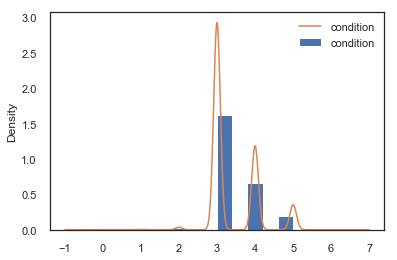

Skewness = 1.0359654660875957
kurtosis = 0.5188394861728596


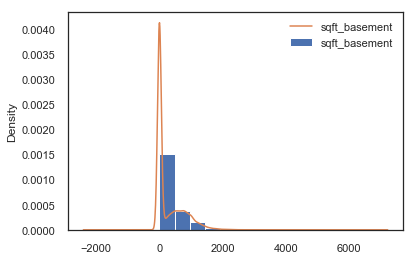

Skewness = 1.605160117149353
kurtosis = 2.812698983417471


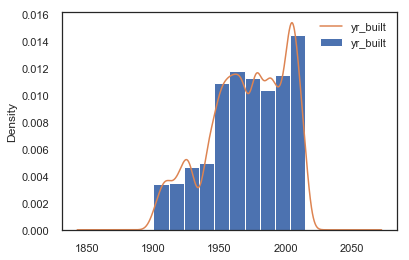

Skewness = -0.46941737064461614
kurtosis = -0.6578199739702928


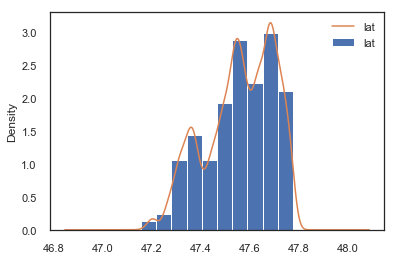

Skewness = -0.4854878678910346
kurtosis = -0.6759115696228029


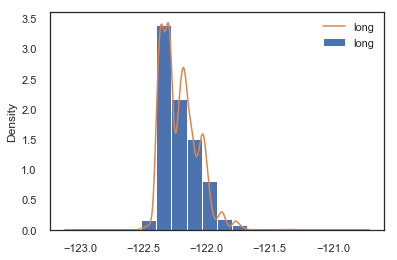

Skewness = 0.8848268791916873
kurtosis = 1.0515989487041475


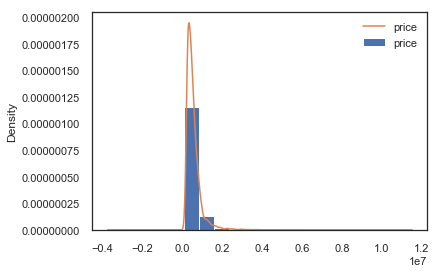

Skewness = 4.023085207745834
kurtosis = 34.53308449607733


In [14]:
#compute the kurtosis(Fisher)of the dataset.

from scipy.stats import kurtosis, skew
for column in ['bedrooms',
       'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_basement','yr_built','lat','long', 'price']:
    kc_pred[column].plot.hist(density=1 )
    kc_pred[column].plot.kde(label=column )
    plt.legend()
    plt.show()
    print ('Skewness =', skew(kc_pred[column]))
    print ('kurtosis =', kurtosis(kc_pred[column]))

 #### Analysis of Outliers in the DataFrame
 
 
From the Scipy definitions:
Kurtosis is the fourth central moment divided by the square of the variance. If Fisher’s definition is used, then 3.0 is subtracted from the result to give 0.0 for a normal distribution.
For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution. 

Several series have high levels of skewness and kurtosis including the target series 'price'. The series that describe the living space: sqft_living, bedrooms, sqft_basement, sqft_lot are leptokurtic (kurtosis>3). This means that the distributions are long with fat tails. Peaks are sharps and high and the data has several outliers. Outliers will expand the horizontal axis which gives the distribution its shape - its skinny and vertical. 

This tells us that there is a large variety of houses in the neighborhood - some very large and some very small relative to the mean. Outliers by themselves are not a problem - especially if there is some proportionality between the IVs and DV outliers. In other words, if our regression has normal residuals we should be happy with the results. 

However this is an initial sign that we will have to normalize and standardize the data. We will lognormalize most of the continous series and then standardize them. This will also help us with Feature Selection once we begin the modelling process.

One last visualization tool before we transform the data. We will do a jointplot of all the continous series. We like JointPlots as we get a lot of summary information in one series of graphs. A jointplot will allow us to visualize between each IV and the DV a scatterplot, the distributions of the two different columns, a kde plot, and even a simple regression line all on the graph. 

C:\Users\amurgai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


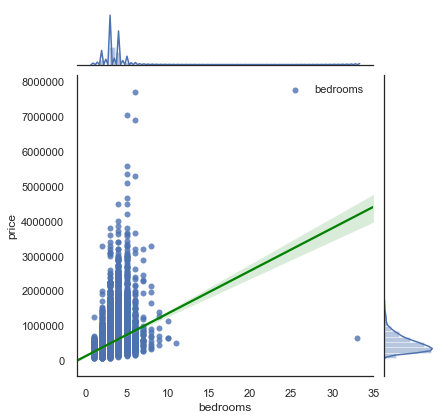

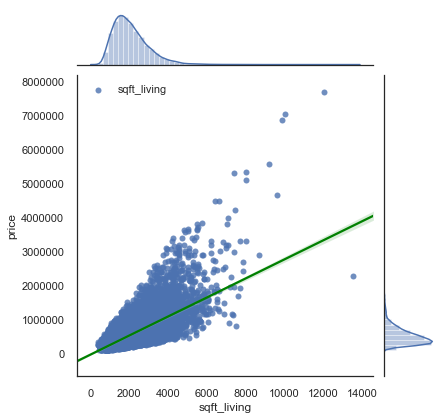

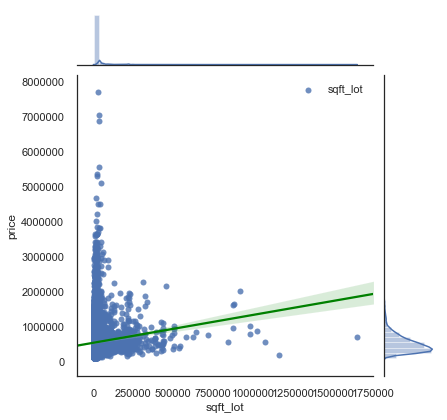

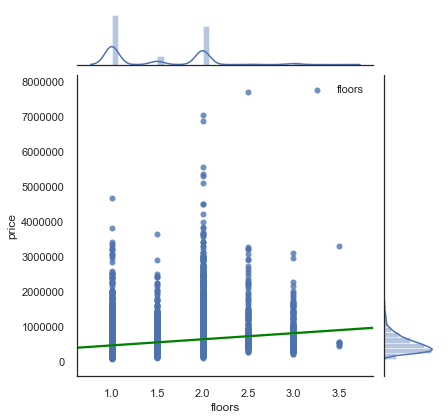

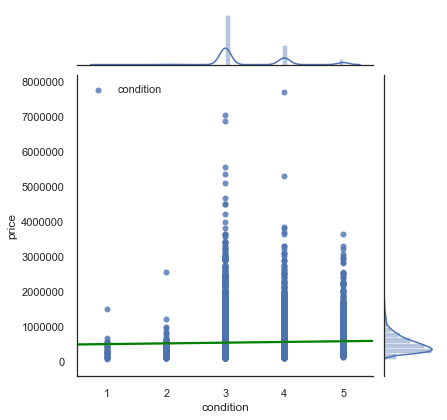

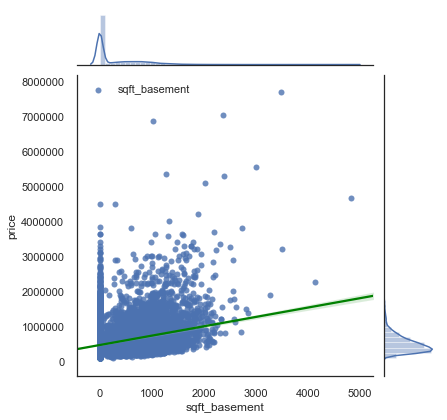

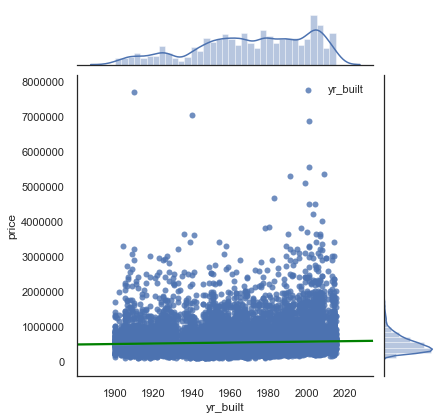

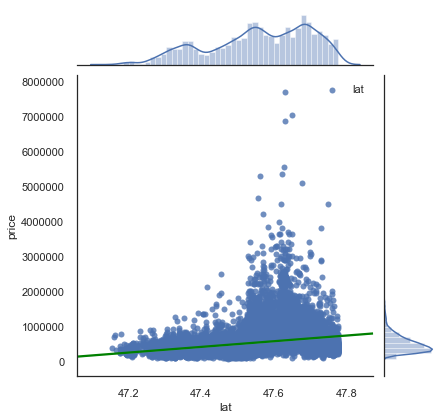

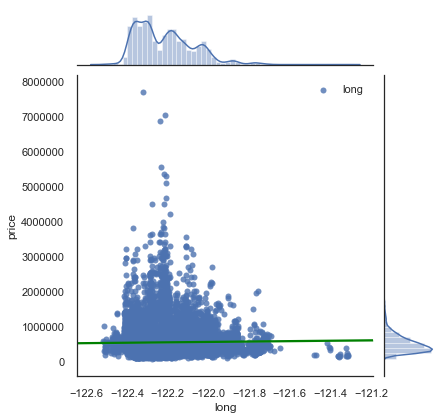

In [15]:
for column in ['bedrooms',
       'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_basement','yr_built','lat','long']:
    sns.jointplot(x=column, y="price",
                  data=kc_pred, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})

    plt.legend()
    plt.show()


The jointplots are instructive. Sqft_living (just by checking visually) seems to have a strong relationship with price as does bedrooms. Condition and Long (longitude) have virtually no relationship. All other IVs seem to have some relationships with the DV (price). We will learn more as we go into the modelling process.


#### Categorical Series:


Several series have some categorical qualities to them: bedrooms, floors, condition, waterfront, view and zipcode. They all have ordinal features. Here are the value counts of each series.


In [16]:
for column in ['bedrooms',
       'floors', 'condition','view','zipcode']:
    print ('Value count of ',[column])
    print (f"------------------------")
    print (f"{kc_pred[column].unique()}")
    print (f"{kc_pred[column].value_counts()}")


Value count of  ['bedrooms']
------------------------
[ 3  2  4  5  1  6  7  8  9 11 10 33]
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
Value count of  ['floors']
------------------------
[1.  2.  1.5 3.  2.5 3.5]
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64
Value count of  ['condition']
------------------------
[3 5 4 1 2]
3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64
Value count of  ['view']
------------------------
[0 3 4 2 1]
0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64
Value count of  ['zipcode']
------------------------
[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 9800

The value counts are interesting. Most of these series have interval like qualities and can be interpreted correctly by models as magnitudes directly relate to the meaning of the series. For example, in bedrooms, if the model were to come up with a non-integer cofficient it would still help to explain the impact of the IV 'bedroom' on 'price'.  
The series with the most need for change seem to be 'zipcode' and 'view'. While both series are ordinal, for zipcode the numbers dont have a natural ascending or descending meaning. For the series 'view', the ordinal numbers may not translate in magnitude. We feel safer in making it a categorical series. We will go ahead and one-hot encode these. This will raise the number of series considerably. Feature Selection will be important for us in the modelling phase.

In [17]:
#creating dummies for encoding
view_dummies = pd.get_dummies(kc_pred["view"], prefix="view")
#dropping the original view series
kc_pred = kc_pred.drop(["view"], axis=1)
zip_dummies = pd.get_dummies(kc_pred["zipcode"], prefix="zip")
kc_pred = kc_pred.drop(["zipcode"], axis=1)
#adding the dummy series to the predictive DataFrame
kc_pred = pd.concat([kc_pred,view_dummies,zip_dummies], axis=1)
print(kc_pred.head())

# look at the keys
kc_pred.keys()


      price  bedrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3         1180      5650     1.0          3   
1  538000.0         3         2570      7242     2.0          3   
2  180000.0         2          770     10000     1.0          3   
3  604000.0         4         1960      5000     1.0          5   
4  510000.0         3         1680      8080     1.0          3   

   sqft_basement  yr_built      lat     long    ...      zip_98146  zip_98148  \
0            0.0      1955  47.5112 -122.257    ...              0          0   
1          400.0      1951  47.7210 -122.319    ...              0          0   
2            0.0      1933  47.7379 -122.233    ...              0          0   
3          910.0      1965  47.5208 -122.393    ...              0          0   
4            0.0      1987  47.6168 -122.045    ...              0          0   

   zip_98155  zip_98166  zip_98168  zip_98177  zip_98178  zip_98188  \
0          0          0          0     

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
       'sqft_basement', 'yr_built', 'lat', 'long', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4', 'zip_98001', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_9812

### Feature Scaling and Standardization:


We will create a separate DataFrame where we log-normalize and standardize variables so we can use RFE to pick the best IVs (features). For RFE, proper scaling is required to make it work properly. We can either use min-max scaling or log-normalize and then standardize. 

For most continous series here we are using log normalization and then standardization. we use min-max scaling for two series that are difficult to log normalize: 'long' and 'sqft_basement'. 

Min-max scaling is a simple method and rescales the series down to [0,1] or [-1,1]. Standardization is commonly used in machine learning algorithms and makes the values of each series have zero-mean and unit-variance.

Post log-normalization, the initial histograms and skewness checks show the data is slightly more normal. Still, we are really looking for normal residuals when we do the regressions. More on that further in the project. 

Skewness and Kurtosis comparison of regular and log data
---Data for log ['bedrooms'] ---
Skewness = -0.68051645921866
kurtosis = 2.0511000609073093
---Data for  ['bedrooms'] ---
Skewness = 2.0235006824707016
kurtosis = 49.81002325740027
Skewness and Kurtosis comparison of regular and log data
---Data for log ['sqft_living'] ---
Skewness = -0.02736006933944492
kurtosis = -0.07929775335686262
---Data for  ['sqft_living'] ---
Skewness = 1.4731131326116373
kurtosis = 5.2506082929452305
Skewness and Kurtosis comparison of regular and log data
---Data for log ['sqft_lot'] ---
Skewness = 0.9624335347705765
kurtosis = 3.328974148585484
---Data for  ['sqft_lot'] ---
Skewness = 13.071695603822912
kurtosis = 285.4294421924969
Skewness and Kurtosis comparison of regular and log data
---Data for log ['sqft_basement'] ---
Skewness = 1.6051603406233164
kurtosis = 2.8126999445376297
---Data for  ['sqft_basement'] ---
Skewness = 1.605160117149353
kurtosis = 2.812698983417471
Skewness and Kurtosis comp

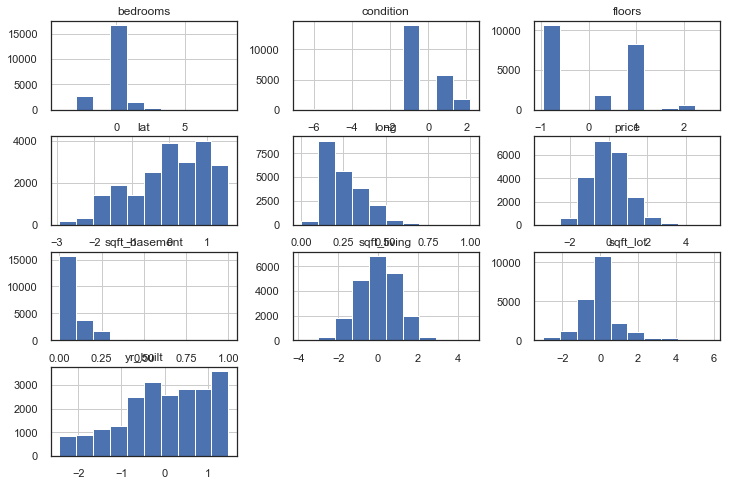

In [18]:
#creating a log dataframe
data_log= pd.DataFrame([])
#log-normalizing all except long and sqft_basement
logbedroom = np.log(kc_pred["bedrooms"])
logsqft_living = np.log(kc_pred["sqft_living"])
logsqft_lot = np.log(kc_pred["sqft_lot"])
logfloors = np.log(kc_pred["floors"])
logcondition = np.log(kc_pred["condition"])
logyr_built = np.log(kc_pred["yr_built"])
loglat = np.log(kc_pred["lat"])
logprice = np.log(kc_pred["price"])
long=kc_pred['long']
sqft_basement=kc_pred['sqft_basement']

#min-max scaling for 'long' and 'sqft_basement'
data_log["long"] = (long-min(long))/(max(long)-min(long))
data_log["sqft_basement"] = (sqft_basement-min(sqft_basement))/(max(sqft_basement)-min(sqft_basement))

#standardization for all other continous variables:
data_log["bedrooms"] = (logbedroom-np.mean(logbedroom))/np.sqrt(np.var(logbedroom))
data_log["sqft_living"] = (logsqft_living-np.mean(logsqft_living))/np.sqrt(np.var(logsqft_living))
data_log["sqft_lot"] = (logsqft_lot-np.mean(logsqft_lot))/np.sqrt(np.var(logsqft_lot))
data_log["floors"] = (logfloors-np.mean(logfloors))/np.sqrt(np.var(logfloors))
data_log["condition"] = (logcondition-np.mean(logcondition))/np.sqrt(np.var(logcondition))
data_log["yr_built"] = (logyr_built-np.mean(logyr_built))/np.sqrt(np.var(logyr_built))
data_log["lat"] = (loglat-np.mean(loglat))/np.sqrt(np.var(loglat))
data_log["price"] = (logprice-np.mean(logprice))/np.sqrt(np.var(logprice))


#graphing for visual look at distributions:
data_log.hist(figsize  = [12, 8]);

#skewness and kurtosis of all transformed variables:
for column in ['bedrooms',
       'sqft_living', 'sqft_lot', 'sqft_basement','floors', 'condition','yr_built','lat','long','price']:
    print ('Skewness and Kurtosis comparison of regular and log data')
    print ('---Data for log',[column],'---')
    print ('Skewness =', skew(data_log[column]))
    print ('kurtosis =', kurtosis(data_log[column]))
    print ('---Data for ',[column],'---')
    print ('Skewness =', skew(kc_pred[column]))
    print ('kurtosis =', kurtosis(kc_pred[column]))

The log-normalized series have better skewness and heteroscedasticity characteristics. Several series that were leptokurtic have more normal distributions post the transformation. The condition series actually had a rise in kurtosis post the transformation. However, as the jointplots told us, condition seems to have little effect on prices. We can look at this more during modelling. 

We were unable to transform the 'long' and sqft_basement series as they had some negative numbers and used min-max scaling for those. 

## Modelling


The goal of our mutiple regression analysis is to produce a model in the form of a linear equation that identifies the best weighted linear combination of independent variables in the study to optimally predict the dependent variable.
(taken from a US sage research publication). 

The combination of variables is picked to minimize the sum of squared differences between the predicted and actual values of the dependent variable. 

When we first start a modelling project we assume a null hyphothesis: that the IVs have 0 relationship to the DV. 

For Modelling these are the steps we plan to take:

1. Run single linear regressions for the regular and standardized data to see which one is better to try
2. Run linear regressions on the categorical data
3. Interpret steps 1 and 2 to pick a final set of IVs
4. Run Feature Ranking with Recursive Feature Elimination to see what set of features work best
5. Run train-test splits to validate findings
6. Confirm with Cross-fold validation
7. Run Feature Ranking with RFECV to find the optimal number of features
8. Use the selection to come up with a final regression/model across the entire dataset. 
9. Interpret the findings

In [19]:
#run linear regressions for each single variable (non-standardized)
#we are using the smf statsmodel so we don't need to specify the intercept
import statsmodels.formula.api as smf
kc_pred.describe().columns.drop(['price'])



Index(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
       'sqft_basement', 'yr_built', 'lat', 'long', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4', 'zip_98001', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_

In [20]:
#we create a new dataframe which takes out the categorical series.
kc_pred_noncat = kc_pred.drop(['view_0', 'view_1',
       'view_2', 'view_3', 'view_4', 'zip_98001', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133',
       'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148', 'zip_98155',
       'zip_98166', 'zip_98168', 'zip_98177', 'zip_98178', 'zip_98188',
       'zip_98198', 'zip_98199'], axis=1)
col_names = kc_pred_noncat.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Kings County: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=kc_pred_noncat).fit()
    X_new = pd.DataFrame({val: [kc_pred_noncat[val].min(), kc_pred_noncat[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

Kings County: price~bedrooms
------------------------------
['bedrooms', 0.0953497028373067, 127199.51268532276, 122464.44417420561, 0.0]
Kings County: price~sqft_living
------------------------------
['sqft_living', 0.49268789904035093, -43988.8921942275, 280.8630143588749, 0.0]
Kings County: price~sqft_lot
------------------------------
['sqft_lot', 0.008077735099593863, 528258.0465134738, 0.7972846608151649, 5.571622021766935e-40]
Kings County: price~floors
------------------------------
['floors', 0.06594805661983016, 279114.99591482355, 174809.0532796442, 0.0]
Kings County: price~condition
------------------------------
['condition', 0.0013000622131941197, 470868.04893983266, 20361.31344947755, 1.1565566735237276e-07]
Kings County: price~sqft_basement
------------------------------
['sqft_basement', 0.10311007135689365, 463664.1303295742, 268.21139643355104, 0.0]
Kings County: price~yr_built
------------------------------
['yr_built', 0.002910962192006261, -789621.8059389996, 674.

In [21]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0953497,127200,122464,0
2,sqft_living,0.492688,-43988.9,280.863,0
3,sqft_lot,0.00807774,528258,0.797285,5.57162e-40
4,floors,0.0659481,279115,174809,0
5,condition,0.00130006,470868,20361.3,1.15656e-07
6,sqft_basement,0.10311,463664,268.211,0
7,yr_built,0.00291096,-789622,674.743,2.11758e-15
8,lat,0.0940602,-3.81351e+07,813191,0
9,long,0.000485599,7.57093e+06,57527.3,0.00120099


We run a second set of pair-wise linear regressions with the standardized data.

In [22]:
col_names = data_log.describe().columns.drop(['price'])
results_log = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Kings County: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=data_log).fit()
    X_new = pd.DataFrame({val: [data_log[val].min(), data_log[val].max()]});
    preds = model.predict(X_new)
    results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

Kings County: price~long
------------------------------
['bedrooms', 0.0953497028373067, 127199.51268532276, 122464.44417420561, 0.0]
Kings County: price~sqft_basement
------------------------------
['sqft_living', 0.49268789904035093, -43988.8921942275, 280.8630143588749, 0.0]
Kings County: price~bedrooms
------------------------------
['sqft_lot', 0.008077735099593863, 528258.0465134738, 0.7972846608151649, 5.571622021766935e-40]
Kings County: price~sqft_living
------------------------------
['floors', 0.06594805661983016, 279114.99591482355, 174809.0532796442, 0.0]
Kings County: price~sqft_lot
------------------------------
['condition', 0.0013000622131941197, 470868.04893983266, 20361.31344947755, 1.1565566735237276e-07]
Kings County: price~floors
------------------------------
['sqft_basement', 0.10311007135689365, 463664.1303295742, 268.21139643355104, 0.0]
Kings County: price~condition
------------------------------
['yr_built', 0.002910962192006261, -789621.8059389996, 674.7430

In [23]:
pd.DataFrame(results_log)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,long,0.00258698,-0.110246,0.435177,7.48367e-14
2,sqft_basement,0.0980436,-0.203414,3.43156,0
3,bedrooms,0.117546,-1.10981e-13,0.34285,0
4,sqft_living,0.455357,-1.53665e-13,0.674802,0
5,sqft_lot,0.019116,-1.52447e-14,0.138261,1.21474e-92
6,floors,0.104323,1.29168e-14,0.322991,0
7,condition,0.00186626,-3.53641e-14,0.0432002,2.13553e-10
8,yr_built,0.00623888,-2.63564e-12,0.0789866,3.06521e-31
9,lat,0.201721,2.05707e-12,0.449133,0


Looking at the linear regressions, in general and overall, the standardized equations have better r-squareds. We will use those. For specific regressions (sqft_living for example), the regular series actually has a better r-squared. However our goal is to get an overall good fit across all the factors. 

Within the standardized series, we will drop any that have r-squareds below 0.01. As our intuition and visual check of the jointplots suggested, both 'condition' and 'long' will be dropped. We will also drop 'yr built'. P-values in these cases also tell the story that the coefficient/slope is not statistically signficantly different from 0. sqft_lot almost falls into this category as well - but does make it above our cut-off point.  

R-squareds are not particularly high, suggesting that no single series can adequately explain price movements. 
Intuitively it makes sense that 'sqft_living' has a strong positive relationship with 'price'. The relationship between 'lat' (latitude) and 'price' is less intuitive. Perhaps location in this dataframe is best represented by latitude. Also we currently havent added back the zipcode series which may be helpful in understanding the relationship of location to price. 

#### Categorical series:

We now look at the relationship of the categorical series to the DV.

In [24]:
kc_pred.describe()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,lat,long,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
count,2.159700e+04,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2080.321850,1.509941e+04,1.494096,3.409825,285.716583,1970.999676,47.560093,-122.213982,...,0.013335,0.002639,0.020651,0.011761,0.012455,0.011807,0.012131,0.006297,0.012965,0.014678
std,3.673681e+05,0.926299,918.106125,4.141264e+04,0.539683,0.650546,439.837158,29.375234,0.138552,0.140724,...,0.114708,0.051307,0.142216,0.107811,0.110909,0.108020,0.109475,0.079106,0.113125,0.120263
min,7.800000e+04,1.000000,370.000000,5.200000e+02,1.000000,1.000000,0.000000,1900.000000,47.155900,-122.519000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1430.000000,5.040000e+03,1.000000,3.000000,0.000000,1951.000000,47.471100,-122.328000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,1910.000000,7.618000e+03,1.500000,3.000000,0.000000,1975.000000,47.571800,-122.231000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2550.000000,1.068500e+04,2.000000,4.000000,550.000000,1997.000000,47.678000,-122.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,33.000000,13540.000000,1.651359e+06,3.500000,5.000000,4820.000000,2015.000000,47.777600,-121.315000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
#changing series type to category
for cat_names in kc_pred.iloc[:,10:].columns:
         kc_pred[cat_names] = kc_pred[cat_names].astype('category')
kc_pred.iloc[:,10:85].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 75 columns):
view_0       21597 non-null category
view_1       21597 non-null category
view_2       21597 non-null category
view_3       21597 non-null category
view_4       21597 non-null category
zip_98001    21597 non-null category
zip_98002    21597 non-null category
zip_98003    21597 non-null category
zip_98004    21597 non-null category
zip_98005    21597 non-null category
zip_98006    21597 non-null category
zip_98007    21597 non-null category
zip_98008    21597 non-null category
zip_98010    21597 non-null category
zip_98011    21597 non-null category
zip_98014    21597 non-null category
zip_98019    21597 non-null category
zip_98022    21597 non-null category
zip_98023    21597 non-null category
zip_98024    21597 non-null category
zip_98027    21597 non-null category
zip_98028    21597 non-null category
zip_98029    21597 non-null category
zip_98030    21597 non-null category
zip

In [26]:
#running regressions (multiple) by categorical series
#dropping one series for each group
kc_view = kc_pred.columns[10:14]
kc_zip = kc_pred.columns[15:84]

cols = [kc_view, kc_zip]
for col in cols:
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data= kc_pred).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     1065.
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:12:48   Log-Likelihood:            -3.0545e+05
No. Observations:               21597   AIC:                         6.109e+05
Df Residuals:                   21592   BIC:                         6.109e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.452e+06   1.89e+04     77.016      

#### Analysis of categorical regressions:


Both 'view' and 'zipcode' show a relationship to 'price'. Within zipcode we will drop three series where p-stats show the coefficient to be not statistically different from 0. we needed to drop 1 anyway - in this case we will drop three. 

### Feature Selection with RFE: 


Here, we now begin the process of trying to pick the best features/IVs to predict the data. The objective of feature selection is to improve prediction performance, provide faster and more cost-effective predictors (in a business sense - for us it isnt as important), and provide more clarity around the underlying process.

There are several drawbacks to feature selection - and we want to be sure to list them before we begin. Linear models rely upon a lot of assumptions.
1. IVs are independent of each other. If assumptions are violated (which they usually are), R-squared and p-values are less reliable. 
2. Using a p-value cutoff of 0.05 means that if you add 100 features to a model that are pure noise, 5 of them (on average) will still be counted as significant
3. Overfitting is a real problem, and there is no guarantee that a model with a high R-squared value will generalize. There are statistical numbers that will measure overfitting but are out of the scope of this project.

R-squareds tend to rise as you add more features - thus its not a reliable measure. Adjusted r-squared penalizes for complexity and therefore its better but not good enough. Train-test splits are very good and so are cross-validation techniques. We will be using both below. 

We being by use RFE - where we use an iterative process to find features. RFECV (which we will use later) finds you the optimal number of features given some assumptions.

We will start with a for loop using RFE where we look at the 5, 15, 25,... up until 85 best features to be selected according to the feature ranking algorithm. We will store the R-squared and adjusted r-squareds in a list. After analyzing it, we will do a train-test split. 

In [27]:
#creating a final dataframe to analyze from
kc_final=data_log
#dropping series with r-squared < 0.01
kc_final=data_log.drop(['long','condition','yr_built'],axis=1)
#adding all categorical series (less 1 series per group)
kc_final = pd.concat([kc_final,view_dummies,zip_dummies], axis=1)
kc_final=kc_final.drop(['view_4','zip_98005','zip_98033','zip_98075'], axis=1)

#look at final dataFrame
kc_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 78 columns):
sqft_basement    21597 non-null float64
bedrooms         21597 non-null float64
sqft_living      21597 non-null float64
sqft_lot         21597 non-null float64
floors           21597 non-null float64
lat              21597 non-null float64
price            21597 non-null float64
view_0           21597 non-null uint8
view_1           21597 non-null uint8
view_2           21597 non-null uint8
view_3           21597 non-null uint8
zip_98001        21597 non-null uint8
zip_98002        21597 non-null uint8
zip_98003        21597 non-null uint8
zip_98004        21597 non-null uint8
zip_98006        21597 non-null uint8
zip_98007        21597 non-null uint8
zip_98008        21597 non-null uint8
zip_98010        21597 non-null uint8
zip_98011        21597 non-null uint8
zip_98014        21597 non-null uint8
zip_98019        21597 non-null uint8
zip_98022        21597 non-null uint8
zip

In [28]:
kc_final.describe()

,sqft_basement,bedrooms,sqft_living,sqft_lot,floors,lat,price,view_0,view_1,view_2,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
count,21597.000000,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,0.059277,2.673285e-13,1.992411e-13,-2.629725e-14,-8.548671e-14,-4.622017e-12,-1.859488e-14,0.902209,0.015280,0.044312,...,0.013335,0.002639,0.020651,0.011761,0.012455,0.011807,0.012131,0.006297,0.012965,0.014678
std,0.091249,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,0.297039,0.122667,0.205792,...,0.114708,0.051307,0.142216,0.107811,0.110909,0.108020,0.109475,0.079106,0.113125,0.120263
min,0.000000,-4.159544e+00,-3.859712e+00,-3.033041e+00,-9.608741e-01,-2.926255e+00,-3.387659e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-2.797245e-01,-6.725680e-01,-5.150931e-01,-9.608741e-01,-6.410090e-01,-6.949183e-01,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-2.797245e-01,9.755471e-03,-5.713116e-02,1.901730e-01,8.588365e-02,-5.926981e-02,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.114108,7.362432e-01,6.910448e-01,3.179305e-01,1.006854e+00,8.508123e-01,6.244407e-01,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8.188596e+00,4.626992e+00,5.905729e+00,2.595509e+00,1.566656e+00,5.333889e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
#remove the dependent variable from the final predictor dataframe:
y = kc_final[["price"]]
X = kc_final.drop(["price"], axis=1)

#importing the right libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# storing the r-squared and adj r-squared in a list and running the regressions
# for now we will pick the top 80 features, running 10 at a time
r_list = []
adj_r_list = []
list_n = list(range(5,80,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print ('number of features selected:', n)
    print('r-squared:', r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print('adjusted r-squared:', adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

number of features selected: 5
r-squared: price    0.149631
dtype: float64
adjusted r-squared: price    0.146589
dtype: float64
number of features selected: 15
r-squared: price    0.569055
dtype: float64
adjusted r-squared: price    0.567513
dtype: float64
number of features selected: 25
r-squared: price    0.802123
dtype: float64
adjusted r-squared: price    0.801415
dtype: float64
number of features selected: 35
r-squared: price    0.818921
dtype: float64
adjusted r-squared: price    0.818273
dtype: float64
number of features selected: 45
r-squared: price    0.82873
dtype: float64
adjusted r-squared: price    0.828117
dtype: float64
number of features selected: 55
r-squared: price    0.840063
dtype: float64
adjusted r-squared: price    0.83949
dtype: float64
number of features selected: 65
r-squared: price    0.844554
dtype: float64
adjusted r-squared: price    0.843998
dtype: float64
number of features selected: 75
r-squared: price    0.854245
dtype: float64
adjusted r-squared: pric

The adjusted r-squareds get better as we include more features. There isn't much difference between the r-squared and adjusted r-squared.The adjusted r-squared penalizes for model complexity - so this tells us that so far more features is better. Let's now do a train-test split to further test this hypothesis. 


### Train-test split

Train-test split allows us to reduce overfitting. We split the data into two sets: a training set where we build the model and a testing set where we then test the prediction.

For our first train-test split we fixed the split at 80/20 and cycled through a varying number of features. We are looking to minimize MSE (mean squared error).  

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,77,5))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
   
    print ('number of features selected:', n)
    print(' train mean squared error:', mse_train)
    print(' test mean squared error:', mse_test)

MSE_test.append(mse_test)
MSE_train.append(mse_train)

number of features selected: 5
 train mean squared error: price    0.856368
dtype: float64
 test mean squared error: price    0.826633
dtype: float64
number of features selected: 10
 train mean squared error: price    0.457743
dtype: float64
 test mean squared error: price    0.472914
dtype: float64
number of features selected: 15
 train mean squared error: price    0.456335
dtype: float64
 test mean squared error: price    0.47185
dtype: float64
number of features selected: 20
 train mean squared error: price    0.23283
dtype: float64
 test mean squared error: price    0.241941
dtype: float64
number of features selected: 25
 train mean squared error: price    0.196096
dtype: float64
 test mean squared error: price    0.205312
dtype: float64
number of features selected: 30
 train mean squared error: price    0.186381
dtype: float64
 test mean squared error: price    0.195014
dtype: float64
number of features selected: 35
 train mean squared error: price    0.180263
dtype: float64
 test

The train and test MSEs are in line with each other and keep dropping as we add features. A bigger model improves our performance, and the test and train performance don't really diverge. This doesn't mean we dont face the possibility of overfitting - but at present with our current tools we cannot analyze that any further.

We now look at train vs test MSEs in two different ways. In the first one, we vary the number of splits (while using all the features). The graph below shows the comparison between train versus test errors. Its fairly stable - widening out as the training dataset becomes smaller. 

In the test below, for each train-test split size, we will generate 100 iterations of models/errors and save the average train/test error. By running the model several times we average out good/bad splits in the data. 

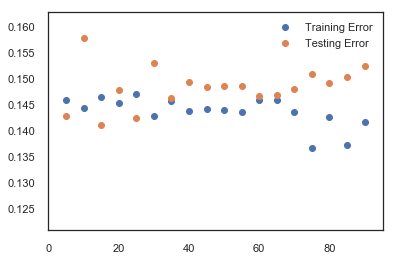

In [31]:
import random
from sklearn.metrics import mean_squared_error
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,95,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

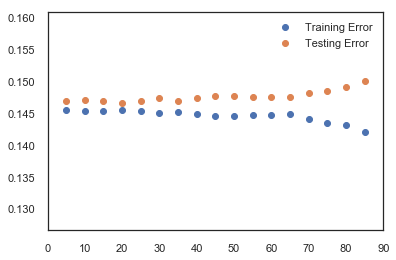

In [32]:
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,90,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

The graph above only iterates to about a 90/10 split. However here again the errors spread only widens when the split is extremely biased. So far all the checks are telling us that a larger model with a wider selection of features is the best way to go. 

We now test with **cross-validation.** 

Train/test splits have the problem that they may not be random. we might be picking cross-sections of data that make the training set very different from the test set - with neither being very representative of the whole population. In order to avoid this, we can perform something called cross validation. It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

In [33]:
from sklearn.model_selection import cross_val_score

# select 75 best predictors

select_75 = RFE(linreg, n_features_to_select = 75)
select_75 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-0.15056137, -0.15967154, -0.15006802, -0.15495422, -0.14183846,
       -0.15081946, -0.14684225, -0.14563151, -0.149605  , -0.12801704])

so far all the tests show the model to be fairly stable. Before we actually use this model for interpretation, we want to try one more thing. 

Is there a model which will pick the optimum number of features for us? RFECV will do this by optimizing via cross-validations. 

Say you run a 3-fold RFECV. For each split, the train set will be transformed by RFE n times (for each possible 1..n number of features). The classifier supplied will be trained on the training set, and a score will be computed on the test set. Eventually, for each 1..n number of features, the mean result from the 3 different splits is shown on the graph you included. Then, RFEVC transforms the entire set using the best scoring number of features. The ranking you see is based on that final transformation. (from stackexchange).

In our case we asked for 5 k-folds and scoring on MSE. The answer came back in line with our RFE tests - more features is better. Effectively the RFECV suggested that we use all the features available.

In [34]:
select_75.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [35]:
select_75.ranking_

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
from sklearn.feature_selection import RFECV
lr = LinearRegression()
estimator = lr
selector = RFECV(estimator=lr, step=1, cv=5, scoring='neg_mean_squared_error')
selector = selector.fit(X, np.ravel(y))
#selector.support_ 

In [37]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [38]:
selector.n_features_

77

In [39]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
selector.estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
selector.grid_scores_

array([-0.98471624, -0.9348787 , -0.89882646, -0.87266659, -0.85245641,
       -0.83035915, -0.73378404, -0.57252145, -0.56723382, -0.5636847 ,
       -0.56152466, -0.44681438, -0.44618097, -0.4460182 , -0.44560759,
       -0.44546708, -0.44531456, -0.39962327, -0.35409367, -0.35269185,
       -0.35197678, -0.29666731, -0.29477511, -0.29348357, -0.19848859,
       -0.19577978, -0.19349689, -0.19214318, -0.19059894, -0.18888325,
       -0.18821461, -0.18676003, -0.18546537, -0.18347898, -0.18264771,
       -0.1819249 , -0.18082464, -0.18002154, -0.17848656, -0.17717174,
       -0.17643585, -0.17540512, -0.17483523, -0.17391257, -0.17309645,
       -0.17211646, -0.17147447, -0.17057329, -0.16959585, -0.16832169,
       -0.16723257, -0.16524394, -0.16340247, -0.16248766, -0.16119519,
       -0.16071507, -0.16015354, -0.15950733, -0.15931715, -0.15852336,
       -0.15819942, -0.15778365, -0.15755602, -0.15715619, -0.15696178,
       -0.15685172, -0.15686094, -0.1530348 , -0.15298283, -0.15

Using all features to come up with the model - given all the analysis above

In [42]:
print("Optimal number of features : %d" % selector.n_features_)

Optimal number of features : 77


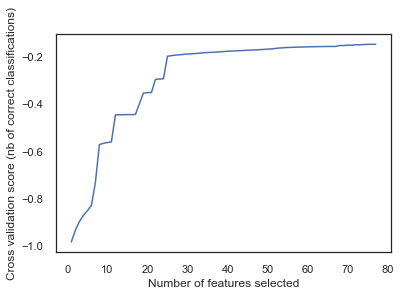

In [43]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [44]:
X.columns

Index(['sqft_basement', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'lat',
       'view_0', 'view_1', 'view_2', 'view_3', 'zip_98001', 'zip_98002',
       'zip_98003', 'zip_98004', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98034', 'zip_98038',
       'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052',
       'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98077',
       'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106',
       'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115',
       'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122',
       'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144',
       'zip_98146', 'zip_98148', 'zip_98155', 'zip_9816

In [45]:
#model using full dataset with new feature set
# I am going to use Statsmodel so I can get the full summary in a nice table
y = kc_final[["price"]]
X = kc_final.drop(["price"], axis=1)
sum_cols = "+".join(X.columns)
form = "price ~" + sum_cols
model = smf.ols(formula= form, data= kc_final).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1641.
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:15:09   Log-Likelihood:                -9828.7
No. Observations:               21597   AIC:                         1.981e+04
Df Residuals:                   21519   BIC:                         2.044e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4637      0.027     53.417

## Interpretation of the results:


The null hypothesis is rejected.The prob(F) tells us that the IVs do have a relationship with the DVs significantly different from 0. 
The r-squared tells us that the model explains 85% of the variance in the price of the house. For most features, the p-stat shows that the coefficient is statistically different from zero. 

#### How do we interpret the coefficients?

Holding all other variables fixed, a 1% change in standardized sqft_living causes a 0.58% change in price. Standardized sq_ft living is an index that shows how far the level of sqft_living is from the average living space in the dataset (deflated by the variance). 

While the coefficient interpretation may not be intuitive, we can make some general statement for coefficients where p-stat is close to 0 (and below 0.05). Here are some interesting points:

1. price is higher for a larger living space (sqft_living) (all other variables being constant)
2. The lot (entire area owned by the property) has a positive relationship with price but its much lower than for living space.
3. Location, location, location: the zipcode where the property is located has a significant impact on price. 
4. If you have a house with larger sqft in the basement, its not positive for the price of the house. 
5. If the number of bedrooms in the house are well above the mean, it can have a detrimental impact on the price of the house.
6. Houses that have been viewed often have a higher price than ones that have not been viewed at all. 
7. Living space, lot size, location, number of bedrooms, number of floors, basement area and how often the house has been viewed when its listed can explain 85% of the variance in price in Kings County.



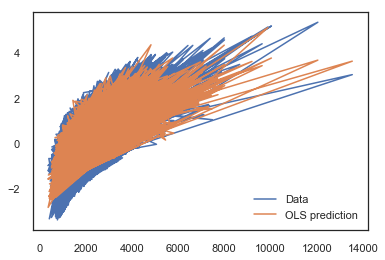

In [46]:
%matplotlib inline
ypredict= model.predict(X)
fig, ax = plt.subplots()
ax.plot(kc.sqft_living, y, label="Data")
ax.plot(kc.sqft_living, ypredict, label="OLS prediction")
ax.legend(loc="best");


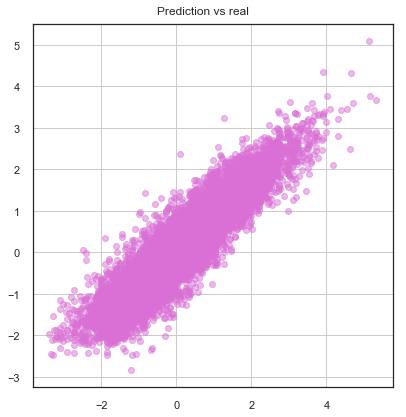

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y, ypredict, alpha=0.5, color='orchid')
fig.suptitle('Prediction vs real')
fig.tight_layout(pad=2); 
ax.grid(True)


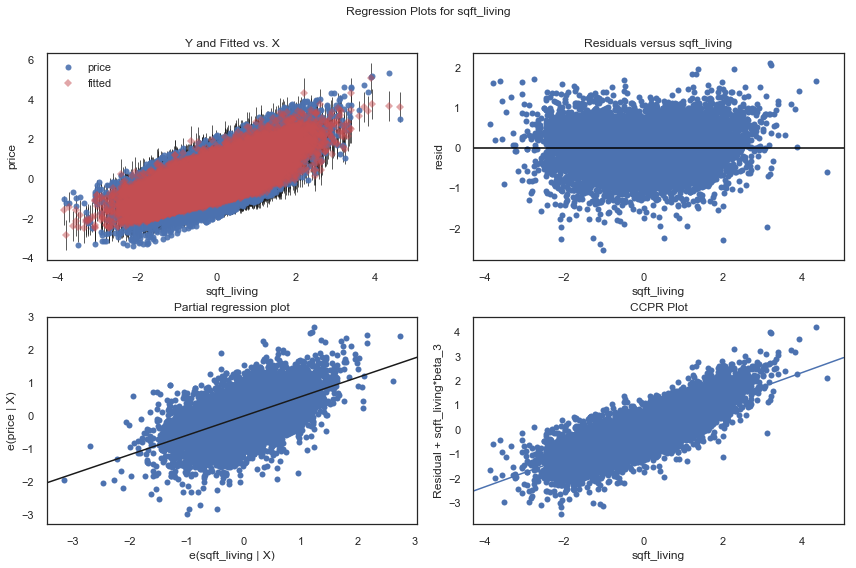

In [58]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)

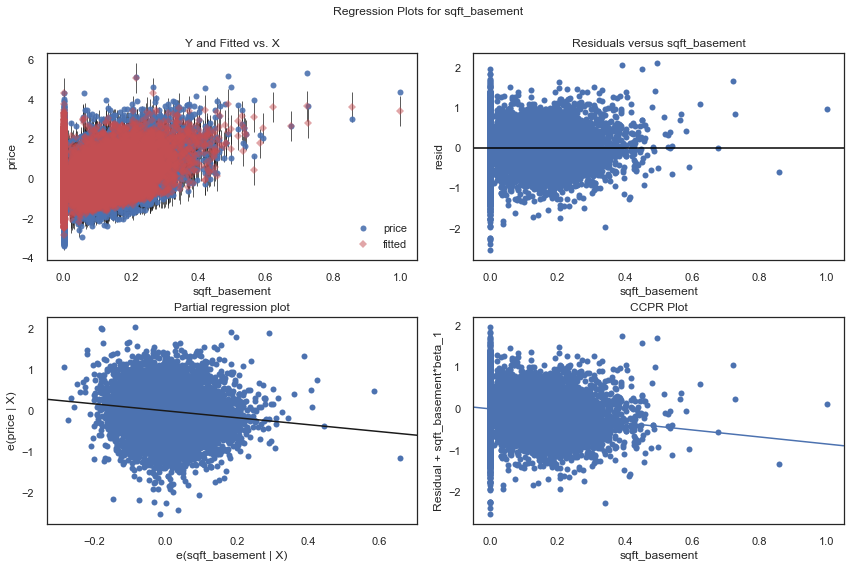

In [59]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_basement", fig=fig)

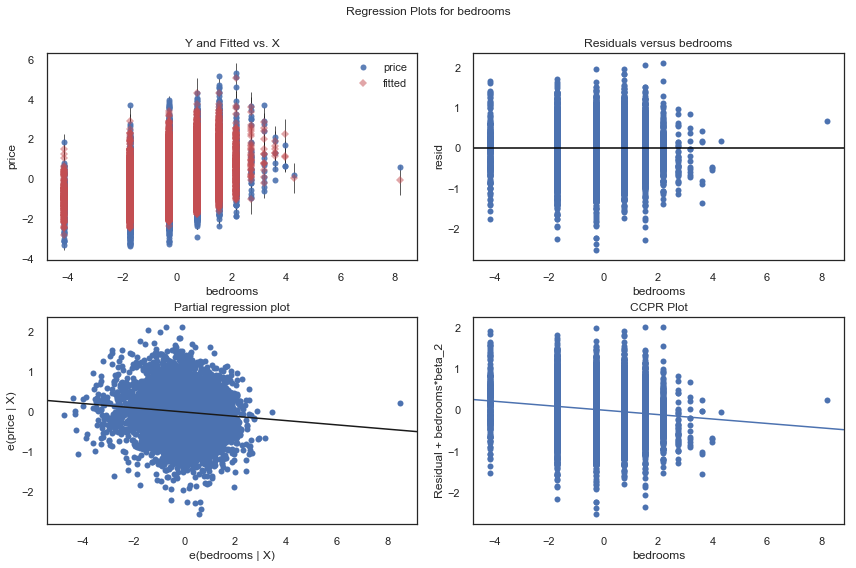

In [61]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)

## Final Conclusions:

** Our final multi-variate regression is able to explain 85% of the variability in home prices in Kings County.**

#### Steps taken to finalize our regression:

1. We downloaded the data in csv format
2. We pre-processed the data by dealing with missing or null values and formatting the series correctly
3. We explored the data and dropped some series that had high correlations with other features. We one-hot encoded categorical series, checked for skewness and heteroskedasticity, lognormalized and standardized continous variables
4. We ran linear regressions of the DV against all IVs in regular and standardized format. We used the results to decide to run the multivariate regressions with standardized series. We ran single linear regressions of the DV against the categorical series as well.
5. We then used Feature Selection with RFE to run a multivariate regression. We ran a single train-test model, then ran it through several splits and several iterations. We then ran cross-validation. All the results suggested using all the features we had to build a good model. We then ran RFECV and reached the same conclusion.
6. Our final model uses 77 features and explains 85% of the variability in home prices in Kings County.

#### Variables used are:

1. Sqft space in the basement
2. Number of bedrooms
3. Sqft living space in the house
4. Sqft space in the lot
5. Number of floors
6. Number of times the house was viewed after listing
7. Location: zipcodes and Latitude

#### Interpretation:

1. price is higher for a larger living space (sqft_living) (all other variables being constant)
2. The lot (entire area owned by the property) has a positive relationship with price but its much lower than for living space.
3. Location, location, location: the zipcode where the property is located has a significant impact on price. 
4. If you have a house with larger sqft in the basement, its not positive for the price of the house. 
5. If the number of bedrooms in the house are well above the mean, it can have a detrimental impact on the price of the house.
6. Houses that have been viewed often have a higher price than ones that have not been viewed at all. 
7. Living space, lot size, location, number of bedrooms, number of floors, basement area and how often the house has been viewed when its listed can explain 85% of the variance in price in Kings County.

## Future Areas of Research:

1. Incorporate a time-based element into the forecasting 
2. Investigate better ways of incorporating location into the forecast other than one-hot encoding zipcode series
3. Understand the 'view' series better and see if one can pull further insights from it.


Thank you. 